In [1]:
# general
from datetime import datetime
from dotenv import load_dotenv, find_dotenv
import os

# custom local libs
from function import baseball_lambda

Python REPL can execute arbitrary code. Use with caution.


In [2]:
# read local .env file
_ = load_dotenv(find_dotenv()) 

In [3]:
# set Langsmith project
today = datetime.now().strftime("%Y%m%d")
os.environ["LANGCHAIN_PROJECT"] = f"Baseball Strikeouts - {today}"

In [4]:
session_id = '0007'

In [5]:
task = '''Plot the cumulative sum of strikeouts thrown by Danny Duffy in the 2018 season.'''
result = baseball_lambda.execute_workflow(task, session_id)
print(result)

{'Orchestrate': {'next': 'Plan'}}
----
Distance to neareast plan: 0.8255935907363892
Formulating a new plan based on User input
Modifying plan with function metadata
{'Plan': {'messages': [HumanMessage(content="\n1. Use the playerid_lookup function to get Danny Duffy's MLBAM player ID:\nfrom pybaseball import playerid_lookup\nduffy_id = playerid_lookup('duffy', 'danny')['key_mlbam'][0]\n\nExample:\nduffy_id = playerid_lookup('duffy', 'danny')['key_mlbam'][0]\nprint(duffy_id)\n# Output: 518633\n\n2. Use the statcast_pitcher function to get Danny Duffy's pitch-level data for the 2018 season:\nfrom pybaseball import statcast_pitcher\nduffy_2018 = statcast_pitcher('2018-03-01', '2018-11-01', player_id=duffy_id)\n\nExample:\nduffy_2018 = statcast_pitcher('2018-03-01', '2018-11-01', player_id=518633)\n\n3. Filter the data to only include pitches where the 'events' column equals 'strikeout':\nduffy_strikeouts = duffy_2018[duffy_2018['events'] == 'strikeout']\n\n4. Create a new column 'cumsum'

In [6]:
task = '''To calculate the cumulative sum, first count the number of strikeouts for each date and then calculate a cumulative sum across the dates."'''
result = baseball_lambda.execute_workflow(task, session_id)
print(result)

{'Orchestrate': {'next': 'Revise'}}
----
{'Revise': {'messages': [HumanMessage(content="\n1. Use the playerid_lookup function to get Danny Duffy's MLBAM player ID:\nfrom pybaseball import playerid_lookup\nduffy_id = playerid_lookup('duffy', 'danny')['key_mlbam'][0]\n\n2. Use the statcast_pitcher function to get Danny Duffy's pitch-level data for the 2018 season:\nfrom pybaseball import statcast_pitcher\nduffy_2018 = statcast_pitcher('2018-03-01', '2018-11-01', player_id=duffy_id)\n\n3. Filter the data to only include pitches where the 'events' column equals 'strikeout':\nduffy_strikeouts = duffy_2018[duffy_2018['events'] == 'strikeout']\n\n4. Count the number of strikeouts for each game date:\nstrikeout_counts = duffy_strikeouts.groupby('game_date')['events'].count().reset_index()\nstrikeout_counts.columns = ['game_date', 'strikeout_count']\n\n5. Sort the data by game_date and calculate the cumulative sum:\nstrikeout_counts = strikeout_counts.sort_values('game_date').reset_index(drop=T

{'Orchestrate': {'next': 'Convert'}}
----
{'Convert': {'code': "\n# Import necessary libraries\nfrom pybaseball import playerid_lookup, statcast_pitcher\nimport matplotlib.pyplot as plt\n\n# 1. Get Danny Duffy's MLBAM player ID\nduffy_id = playerid_lookup('duffy', 'danny')['key_mlbam'][0]\n\n# 2. Get Danny Duffy's pitch-level data for the 2018 season\nduffy_2018 = statcast_pitcher('2018-03-01', '2018-11-01', player_id=duffy_id)\n\n# 3. Filter data to only include pitches where 'events' column equals 'strikeout'\nduffy_strikeouts = duffy_2018[duffy_2018['events'] == 'strikeout']\n\n# 4. Count the number of strikeouts for each game date\nstrikeout_counts = duffy_strikeouts.groupby('game_date')['events'].count().reset_index()\nstrikeout_counts.columns = ['game_date', 'strikeout_count']\n\n# 5. Sort the data by game_date and calculate the cumulative sum\nstrikeout_counts = strikeout_counts.sort_values('game_date').reset_index(drop=True)\nstrikeout_counts['cumsum'] = strikeout_counts['strik

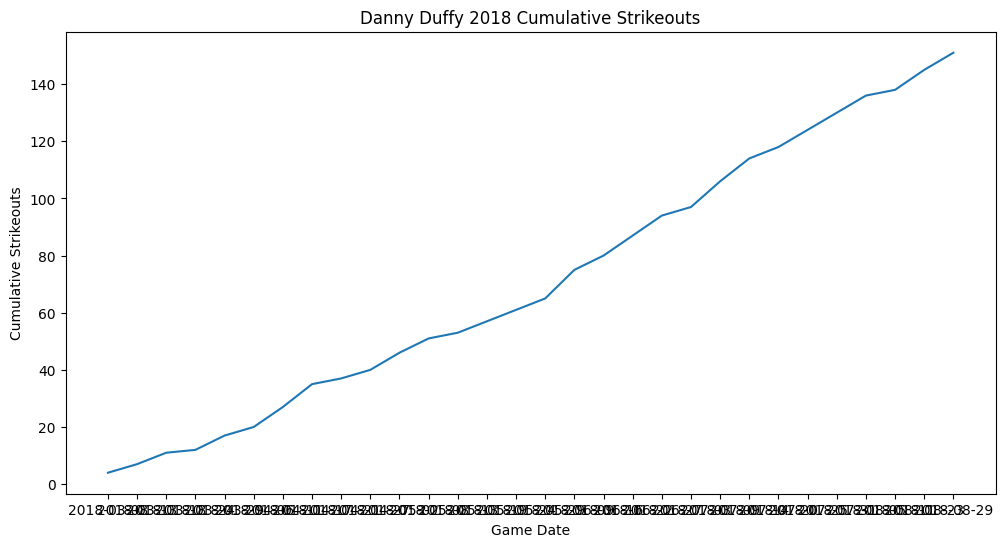

{'Execute': {'messages': [AIMessage(content="\nHere is the code that was used to reach this solution:\n```python\n\n# Import necessary libraries\nfrom pybaseball import playerid_lookup, statcast_pitcher\nimport matplotlib.pyplot as plt\n# 1. Get Danny Duffy's MLBAM player ID\nduffy_id = playerid_lookup('duffy', 'danny')['key_mlbam'][0]\n# 2. Get Danny Duffy's pitch-level data for the 2018 season\nduffy_2018 = statcast_pitcher('2018-03-01', '2018-11-01', player_id=duffy_id)\n# 3. Filter data to only include pitches where 'events' column equals 'strikeout'\nduffy_strikeouts = duffy_2018[duffy_2018['events'] == 'strikeout']\n# 4. Count the number of strikeouts for each game date\nstrikeout_counts = duffy_strikeouts.groupby('game_date')['events'].count().reset_index()\nstrikeout_counts.columns = ['game_date', 'strikeout_count']\n# 5. Sort the data by game_date and calculate the cumulative sum\nstrikeout_counts = strikeout_counts.sort_values('game_date').reset_index(drop=True)\nstrikeout_co

In [7]:
task = "approved"
result = baseball_lambda.execute_workflow(task, session_id)
print(result)

In [8]:
task = "yes"
result = baseball_lambda.execute_workflow(task, session_id)
print(result)

{'Orchestrate': {'next': 'Memorize'}}
----
{'Memorize': {'messages': [AIMessage(content='Thank you, task has been commited to memory')], 'previous_node': 'Memorize'}}
----
Thank you, task has been commited to memory
